Text(0.5, 0, 't (Time)')

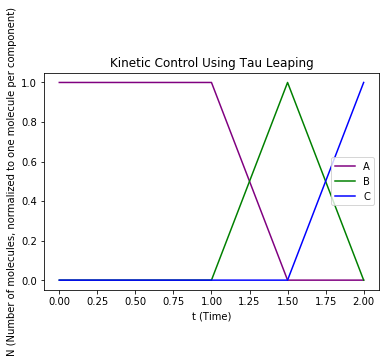

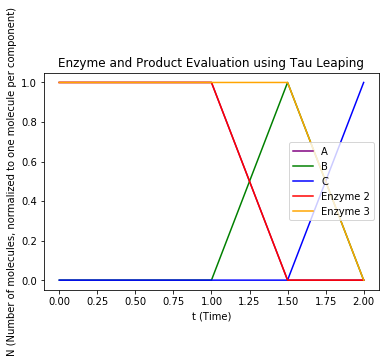

In [6]:
import numpy as np
import matplotlib.pyplot as plt

V = np.array([-1, 0, 0, 0, 1, -1, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, -1, -1, 0]).reshape((5,4))

Y = np.zeros(5)
Y[0] = 1 # molecules of A
Y[1] = 0 # molecules of B
Y[2] = 0 # molecules of C
Y[3] = 1 # molecules of E2
Y[4] = 1 # molecules of E3
# Rate Constants - we can change these for variations
c0 = 2 #formation of B
c1 = 5 #formation of C
c2 = 0.1 #degradation of E3
c3 = 0.1 #degradation of E2
k0 = 1
k1 = 1
c = np.array([c0, c1, c2, c3])
k = np.array([k0,k1])

#Define and Initialize Variables

t = 0
tfinal = 2
L = 5
tau = tfinal/L
tvals = np.zeros(L)
Yvals = np.zeros((L, 5))
Yvals[0, :] = Y 
a = np.zeros(4)
d = np.zeros(4)
for k in range(L):
    a[0] = c[0] * Y[0] / (k0+ Y[0])
    a[1] = c[1] * Y[1] / (k1+ Y[1])
    a[2] = c[2] * Y[4]
    a[3] = c[3] * Y[3]
    d[0] = np.random.poisson(a[0] * tau)
    d[1] = np.random.poisson(a[1] * tau)
    d[2] = np.random.poisson(a[2] * tau)
    d[3] = np.random.poisson(a[3] * tau)
    Y += d[0] * V[:, 0] + d[1] * V[:, 1] + d[2] * V[:, 2] +d[3] * V[:, 3]
    Yvals[k, :] = Y

tvals = np.linspace(0, tfinal, L)
plt.plot(tvals, Yvals[:, 0], label='A', color="purple")
plt.plot(tvals, Yvals[:, 1], label='B', color='green')
plt.plot(tvals, Yvals[:, 2], label='C', color='blue')
plt.legend(loc=7)
plt.title('Kinetic Control Using Tau Leaping')
plt.ylabel('N (Number of molecules)')
plt.xlabel('t (Time)')
plt.figure()
plt.plot(tvals, Yvals[:, 0], label='A', color="purple")
plt.plot(tvals, Yvals[:, 1], label='B', color='green')
plt.plot(tvals, Yvals[:, 2], label='C', color='blue')
plt.plot(tvals, Yvals[:, 3], label='Enzyme 2', color='red')
plt.plot(tvals, Yvals[:, 4], label = 'Enzyme 3', color='orange')
plt.legend(loc=7)
plt.title('Enzyme and Product Evaluation using Tau Leaping')
plt.ylabel('N (Number of molecules)')
plt.xlabel('t (Time)')